# **INDIA-START-UP-ECOSYSTEMS**

## Project Description
We embark on a journey of discovery as we leverage our data analysis expertise to uncover the untapped potential within the Indian startup ecosystem. This project is designed to not only decode the numbers but to distill insights that will guide our team towards a successful foray into this dynamic market.

## Scope of Work

- Conduct a thorough exploration of datasets, dissecting funding patterns, sectoral nuances, and geographical hotspots in the Indian startup landscape
- Analyze funding received by startups in india from 2018 to 2021



## Hypothesis 

**Null Hypothesis (H0)**: There is no significant relationship between funding and the sector  

**Alternative Hypothesis (H1)**: There is a significant relationship between funding and the sector

In [1]:
## import the necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pyodbc
from dotenv import dotenv_values
import os


#data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
## Data environment access
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env')


# Get the values for the credentials you set in the '.env' 
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")


connection_string= f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [3]:
# connect your data using pyodbc
connection=pyodbc.connect(connection_string)

### DATA UNDERSTANDING 
1. Load in all the various dataset required for the analyse. Dataset is in various source platforms
2. Check info for more information on each of the dataset and data type 
3. We will be concatenating the datasets and create one dataset source
4. Check info with the new dataset 
5. Assess the mean, std, percentile, count with describe
6. Check for null values
7. Do an exploratory data analysis

### DEFINITION OF DATASET VARIABLE
| NAME              | DEFINITION                  |
|:----------------: |:-------------------         |
| Company brand     | Company's name              |
| Founded           | Represents the year a company was started |
| Headquaters       | The location of the business |
| Sector            | The industry under which the companies are in |
| What it does      | Overview of what the company does |
| Founders          | The CEO or the person who started the company |
| Investor          | A person who is investing into the company |
| Amount            | The amount of funds received by the company |
| Stage             | The stage of funding at which the company is in |

#### DATA LOADING AND OVERVIEW

Data overview 2021

In [4]:
query = "SELECT * FROM dbo.LP1_startup_funding2021"

data1 = pd.read_sql(query, connection)
data1.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [5]:
data1['year'] = 2021
data1.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


### E.D.A for 2021 dataset

In [6]:
#check for info on data 1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   year           1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [7]:
## checking for number of columns and rows
print (data1.shape)
print(f"There are {data1.shape[0]} rows, and {data1.shape[1]} columns")

(1209, 10)
There are 1209 rows, and 10 columns


In [8]:
## checking for duplicates
print("There are ",data1.duplicated().sum(),"duplicate(s)")

There are  19 duplicate(s)


In [9]:
## Checking for nulls
data1.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
year               0
dtype: int64

In [10]:
# performing descriptive analysis
data1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1209,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1208.0,NaN,NaN,NaN,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1208,70,Bangalore,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1209,254,FinTech,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1209,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1205,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1147,937,Inflection Point Ventures,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,1206,278,$Undisclosed,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,781,31,Seed,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1209.0,NaN,NaN,NaN,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0


### Findings
--> BharatPe is the most common company

--> most companies invested in the FinTech sector

-->Majority of the companies were found in Bangalore

Data 2020 overview

In [11]:
query = "SELECT * FROM dbo.LP1_startup_funding2020"

data2 = pd.read_sql(query, connection)
data2.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [12]:
data2['year'] = 2020
data2.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


### E.D.A for 2020 dataset

In [13]:
#check for info 
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [14]:
## checking for number of columns and rows
print (data2.shape)
print(f"There are {data2.shape[0]} rows, and {data2.shape[1]} columns")
## checking for duplicates
print("There are ",data2.duplicated().sum(),"duplicate(s)")

(1055, 11)
There are 1055 rows, and 11 columns
There are  3 duplicate(s)


In [15]:
## Checking for nulls
data2.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
year                0
dtype: int64

In [16]:
# performing descriptive analysis
data2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1055,905,Nykaa,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,842.0,NaN,NaN,NaN,2015.36342,4.097909,1973.0,2014.0,2016.0,2018.0,2020.0
HeadQuarter,961,77,Bangalore,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1042,302,Fintech,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1055,990,Provides online learning classes,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1043,927,Falguni Nayar,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1017,848,Venture Catalysts,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,801.0,NaN,NaN,NaN,113042969.543071,2476634939.888347,12700.0,1000000.0,3000000.0,11000000.0,70000000000.0
Stage,591,42,Series A,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column10,2,2,Pre-Seed,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Findings 
--> Nykaa company was the most common company

--> Majority of the companies had their headquarter at Bangalore

--> The average Amount invested was 113042969.54

Data overview 2019

In [17]:
data3 = pd.read_csv("startup_funding2019.csv")
data3.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [18]:
data3['year'] = 2019
data3.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


### E.D.A for 2019

In [19]:
# check for info data 2
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [20]:
## checking for number of columns and rows
print (data3.shape)
print(f"There are {data3.shape[0]} rows, and {data3.shape[1]} columns")

(89, 10)
There are 89 rows, and 10 columns


In [21]:
## Checking for nulls
data3.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
year              0
dtype: int64

In [22]:
## checking for duplicates
print("There are ",data3.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [23]:
# performing descriptive analysis
data3.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
HeadQuarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,89.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0


### Findings
--> Kratikal company was the most common company

--> Most companies had their headquarters based in Bangalore

--> Majority of the companies are involved in the Edtech sector 

Data overview 2018

In [24]:
data4= pd.read_csv("startup_funding2018.csv")
data4.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [25]:
data4['year'] = 2018
data4.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


### E.D.A for 2018 dataset

In [26]:
#check for info on data 3
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [27]:
## checking for number of columns and rows
print (data4.shape)
print(f"There are {data4.shape[0]} rows, and {data4.shape[1]} columns")

(526, 7)
There are 526 rows, and 7 columns


In [28]:
# performing descriptive analysis
data4.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company Name,526,525,TheCollegeFever,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,526,405,—,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Round/Series,526,21,Seed,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,526,198,—,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,526,50,"Bangalore, Karnataka, India",102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,526.0,NaN,NaN,NaN,2018.0,0.0,2018.0,2018.0,2018.0,2018.0,2018.0


#### Findings
--> TheCollegeFever company was the most common company

-->Seed series was the most preffered

-->most companies were based in Bangalore location

Cleaning amount column

In [29]:

# Replace '₹', commas, '—', and "''" in 'Amount' column
data4['Amount'] = data4['Amount'].str.replace(',', '').str.replace('—', '').str.replace("''",'').replace('', np.nan)

# Conditionally apply multiplication only where '₹' is present
mask = data4['Amount'].str.contains('₹', na=False)
data4.loc[mask, 'Amount'] = data4.loc[mask, 'Amount'].str.replace('₹', '').astype(float) * 0.0146

#### CONCATENATE THE DATA INTO ONE DATAFRAME
 The column names of the datasets above are different but with the same data.
 Create a function that will rename the columns and restructure the data.

In [30]:
def concat_dataframes(data1,data2, data3, data4):
    """
    Concatenates four dataframes along the row axis.

    Parameters:
    data1 (pandas.DataFrame): The first dataframe to concatenate.
    data2 (pandas.DataFrame): The second dataframe to concatenate.
    data3 (pandas.DataFrame): The third dataframe to concatenate.
    data4 (pandas.DataFrame): The fourth dataframe to concatenate.

    Returns:
    pandas.DataFrame: The concatenated dataframe.
    """
    # Rename columns to make them consistent across dataframes
    df1 = data1.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series', 'year' : 'year'})
    df2 = data2.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series','year' : 'year'})
    df3 = data3.rename(columns={'Company/Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What it does': 'about_company','Founders':'founders','Investor':'investor','Amount($)':'amount','Stage':'series','year' : 'year'})
    df4 = data4.rename(columns={'Company Name': 'company_brand','Location': 'headquarter','Industry': 'sector','About Company': 'about_company','Amount':'amount','Round/Series':'series','year' : 'year'})

    # Concatenate dataframes along the row axis
    result = pd.concat([df1, df2, df3,df4], axis=0)

    return result


In [31]:
dataset= concat_dataframes(data1,data2,data3,data4)
dataset.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year,column10
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021,NaN
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021,NaN
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021,NaN


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 525
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   about_company  2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2474 non-null   object 
 8   series         1941 non-null   object 
 9   year           2879 non-null   int64  
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 269.9+ KB


In [45]:
dataset.shape

(2879, 10)

In [46]:
dataset.describe()

,founded,amount,year
count,2110.000000,2.879000e+03,2879.000000
mean,2016.079621,9.797431e+07,2020.023619
std,4.368006,3.085577e+09,1.086974
min,1963.000000,8.760000e+02,2018.000000
25%,2015.000000,1.000000e+06,2020.000000
50%,2017.000000,3.000000e+06,2020.000000
75%,2019.000000,8.000000e+06,2021.000000
max,2021.000000,1.500000e+11,2021.000000


In [47]:
dataset.describe(include='all')

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
count,2879,2110.000000,2760,2860,2879,2334,2251,2.879000e+03,1945,2879.000000
unique,2214,NaN,169,870,2691,1979,1774,NaN,75,NaN
top,BharatPe,NaN,Bangalore,FinTech,Provides online learning classes,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,NaN,Seed,NaN
freq,10,NaN,764,173,5,7,36,NaN,608,NaN
mean,NaN,2016.079621,NaN,NaN,NaN,NaN,NaN,9.797431e+07,NaN,2020.023619
std,NaN,4.368006,NaN,NaN,NaN,NaN,NaN,3.085577e+09,NaN,1.086974
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,8.760000e+02,NaN,2018.000000
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020.000000
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020.000000
75%,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,8.000000e+06,NaN,2021.000000


In [48]:
dataset.isna().sum()

company_brand      0
founded          769
headquarter      119
sector            19
about_company      0
founders         545
investor         628
amount             0
series           934
year               0
dtype: int64

In [49]:
dataset.duplicated().sum()

23

In [50]:
dataset.nunique()

company_brand    2214
founded            34
headquarter       169
sector            870
about_company    2691
founders         1979
investor         1774
amount            506
series             75
year                4
dtype: int64

OBSERVATION
###  Issues with the data
1. There is a discrepancy in the naming conventions between the columns in the 2018 and 2019 datasets compared to the 2020 and 2021 datasets.

2. The 2018 dataset exhibits some missing columns, contributing to an incomplete representation of the data.

3. Conversely, the 2020 dataset contains an additional column that appears to be extraneous and does not serve a meaningful purpose in our analysis.

### Course of Action:
##### 1. Missing Column Engineering for 2018:
---> We will address the absence of certain columns in the 2018 dataset by employing data engineering techniques to create and populate the missing columns, ensuring a comprehensive and consistent dataset.

##### 2. Column Name Standardization:
---> To establish uniformity and coherence across all datasets, we will embark on a column renaming process for the 2018 and 2019 datasets. This action aims to align the naming conventions with those observed in the 2020 and 2021 datasets, facilitating seamless data integration and analysis. 

#### 3. Extraneous Column Removal in 2020:
---> The redundant column identified in the 2020 dataset will be removed, streamlining the dataset and eliminating unnecessary elements that do not contribute to the overall analysis objectives.

These actions collectively enhance the integrity, consistency, and completeness of the dataset, paving the way for a more robust and coherent analytical process. ical process


BUSINESS QUESTIONS 
1. How does funding vary across different industry sectors in India?
2. How does funding vary with the loaction of the start-ups
3. What is the relationship between the amount of funding and the stage of the company?
4. How have funding trends evolved between 2018 and 2021?
5. What are the most attractive sectors for investors?
6. Does the location of the company influence its sector?




#### DATA PREPARATION AND CLEANING 

In [ ]:
# pd.set_option("display.max_rows", None)
# pd.set_option('display.max_colwidth', None)


In [33]:
dataset= dataset.reset_index(drop=True)

In [34]:
#Drop the extreneous column 10
dataset.drop('column10', axis=1, inplace= True)

correct all wrong entries

In [35]:
def swap_row_cells(df, row_index, col1_index, col2_index):
    """
    Swaps the values in the given columns and row of a data array.

    Parameters:
    df (list): A 2D list representing the data array.
    row_index (int): The index of the first column.
    col1_index (int): The index of the second column.
    col2_index (int): The index of the row where the values are swapped.

    Returns:
    list: The modified data array with swapped values.
    """
    df.loc[row_index, [col1_index,col2_index]] = df.loc[row_index,[col2_index,col1_index]].values
    
    return df
    

In [36]:
# correcting all the cells with wrong entries
#### row index 1100 
swap_row_cells(dataset, 1100, 'investor', 'amount')
swap_row_cells(dataset, 1100, 'founders', 'investor')
swap_row_cells(dataset, 1100, 'about_company', 'founders')
swap_row_cells(dataset, 1100, 'sector', 'about_company')
swap_row_cells(dataset, 1100, 'headquarter', 'sector')

#### row index 257
swap_row_cells(dataset, 257, 'amount', 'series')
swap_row_cells(dataset, 257, 'investor', 'amount')
swap_row_cells(dataset, 257,'founders', 'investor')
swap_row_cells(dataset, 257,'about_company', 'founders')
swap_row_cells(dataset, 257,'sector', 'about_company')

#### row index 242
swap_row_cells(dataset,242,'amount', 'series' )
swap_row_cells(dataset,242,'investor', 'amount' )
swap_row_cells(dataset, 242, 'founders', 'investor')
swap_row_cells(dataset, 242, 'about_company', 'founders')
swap_row_cells(dataset, 242, 'sector', 'about_company')
swap_row_cells(dataset,242, 'headquarter', 'sector')

### row index 256
swap_row_cells(dataset, 256, 'amount', 'series')
swap_row_cells(dataset, 256, 'investor', 'amount')
swap_row_cells(dataset, 256, 'founders', 'investor')
swap_row_cells(dataset, 256, 'about_company', 'founders')
swap_row_cells(dataset, 256, 'sector', 'about_company')
swap_row_cells(dataset, 256, 'headquarter', 'sector')

#### row index 241
swap_row_cells(dataset, 241, 'headquarter', 'sector')

#### row index 1176
swap_row_cells(dataset, 1176, 'headquarter', 'sector')

#### row index 255
swap_row_cells(dataset, 255, 'headquarter', 'sector')

#### row index 538
swap_row_cells(dataset, 538, 'amount', 'series')

#### row index 1148
swap_row_cells(dataset, 1148, 'amount', 'series')
swap_row_cells(dataset, 1148, 'investor', 'amount')

### row index 677
swap_row_cells(dataset, 677, 'amount', 'series')

#### row index 551
swap_row_cells(dataset, 551, 'amount', 'series')

#### row index 545
swap_row_cells(dataset, 545, 'amount', 'series')
swap_row_cells(dataset,545, 'investor', 'amount')

#### row index 98
swap_row_cells(dataset, 98, 'amount', 'series')

#### row index 111
swap_row_cells(dataset, 111, 'amount', 'series')

### row index 674
swap_row_cells(dataset, 674, 'amount', 'series')



# replace computer games with none 
dataset['headquarter'] = dataset['headquarter'].replace('Computer Games', None)


DATA CLEANING ON EACH COLUMN 

1. COMPANY_BRAND 

In [51]:
#check for missing values
print(f" There are {dataset['company_brand'].isnull().sum()} missing values")


 There are 0 missing values


In [52]:
dataset['company_brand'].unique()

array(['Unbox Robotics', 'upGrad', 'Lead School', ..., 'Mombay',
       'Droni Tech', 'Netmeds'], dtype=object)

In [53]:
# check for duplicates and unique company names
dataset['company_brand'].unique
print(f" There are {dataset['company_brand'].duplicated().sum()} duplicates")

 There are 665 duplicates


Since there are companies with unique names but dealing in different sectors we wont alter the duplicates.

The column company brand is cleaning

2. FOUNDED

In [54]:
# there are missing years in the dataset 
print(f" There are {dataset['founded'].isna().sum()} missing values")

# check the data type
print(f"The column is a {dataset['founded'].dtype} data type")

 There are 769 missing values
The column is a float64 data type


COURSE OF ACTION

---> We will be cleaning the missing values by fill them using interpolate method which is suitable for time series data.

---> We will also be converting the data type from float to datetime for purpose of our analysis.

In [55]:
dataset["founded"].interpolate(method='linear',inplace= True)

print(f"There are {dataset['founded'].isna().sum()} missing values")

There are 0 missing values


In [56]:
# Convert to datetime
dataset['founded'] = pd.to_datetime(dataset['founded'], format='%Y')

# Convert to period
dataset['founded'] = dataset['founded'].dt.to_period('Y')


3. HEADQUARTER


In [57]:
dataset['headquarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Cochin',
       'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara', 'Hauz Khas',
       'Gurugram\t#REF!', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana',
       'Indore', 'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna',
       'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Faridabad', 'Roorkee', 'Ambernath',
       'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 'Mangalore',
       'Telugana', 'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji',
       'Satara', 'Orissia', 'Jodhpur', 'New York', 'Santra',
       'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Kochi', 'London',
       'Manchester, Greater Manchester', 'The Nilgiris', 'Gandhinagar',
       'Belgaum', 'Tirunelveli, Tami

In [58]:
print(f"there are {dataset['headquarter'].isnull().sum()} missing values")


there are 119 missing values


Observation

---> There are companies which have unidentified locations and have been placed as none.

----> There are wrong entries in the column

---> Clean the locations with only the city for accurate analysis.

Course of action

----> Since there are companies where their location is unidentified as none we will fill the missing values with none.

----> split the long locations with one location.

----> assess the wrong entries and place a function that returns the orginal data into the column.

----> restructuring the headquarter names with actual location names


In [59]:
def clean_replace(dataframe,column_name):
    dataframe[column_name] = dataframe[column_name].replace('—', np.nan)
    #clean the nan values with none
    dataframe[column_name] = dataframe[column_name].fillna(value='None')

    return dataframe

In [60]:
clean_replace(dataset,"headquarter")

print(f"There are {dataset['headquarter'].isnull().sum()} missing values")

There are 0 missing values


In [61]:
dataset['headquarter']= dataset['headquarter'].str.split(',').str[0].str.replace("'","", regex=True)
dataset['headquarter'] = dataset['headquarter'].str.strip('\t#REF!')

In [62]:
dataset['headquarter']=dataset['headquarter'].replace({'Bengaluru': 'Bangalore', 'Banglore': 'Bangalore', 'Gurugram': 'Gurgaon', 'Hyderebad': 'Hyderabad', 
                                      'New Delhi': 'Delhi', 'Ahmadabad': 'Ahmedabad', 'Ernakulam': 'Cochin', 'Telugana': 'Telangana',
                                      'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco', 'Samsitpur': 'Samastipur', 'Santra': 'Samtra',
                                      'Rajsamand': 'Rajasthan', 'Kerala': 'Kochi','The Nilgiris': 'Nilgiris', 'Gurugram': 'Gurgaon', 
                                      'California': 'San Francisco', 'San Francisco Bay Area': 'San Francisco', 'Hyderebad': 'Hyderabad' ,'Small Towns': 'Small Towns','Orissia': 'Odisha', 
                                      'Santra': 'Samtra', 'Vadodara': 'Vadodara', 'Bangaldesh': 'Bangladesh',}) 


4. SECTOR 


In [63]:
dataset["sector"].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [64]:
print(f" There are {dataset['sector'].isnull().sum()} missing values")

 There are 19 missing values


Observation 

----> There are unidentified sectors/industries which have none

----> There are unidentified sectors that need to be replaced with actual industry names

Course of action 

----> We will be replacing the missing values with none to show some companies have unidentified industry they are in.

----> Replace the unidentified names with industry names

----> map the sector column with a more structured common industry names

In [65]:
import re

In [66]:
dataset['sector'] = dataset['sector'].str.split(',').str[0].str.replace("'", '', regex=True)

In [67]:

dataset['sector'].replace('Android','Edtech', inplace=True, regex=True)
dataset['sector'].replace('Crowdfunding', 'Crowdsourcing', inplace=True ,regex=True)
dataset['sector'].replace('Wellness', 'HealthTech',inplace=True ,regex=True)
dataset['sector'].replace('Basketball', ' Apps', inplace=True, regex=True)
dataset['sector'].replace('Catering', 'Food Industry', inplace=True, regex=True)
dataset['sector'].replace('Cooking', 'Food Industry',inplace=True, regex=True)

In [68]:

def categorize_sector(df):
    # replace renewables 
    df['sector'].replace(['Solar Monitoring Company','Solar','Solar solution','Renewable Energy',
                           'Solar Solution','Solar SaaS','Photonics startup','Renewables & Environment',
                           ],'Renewable player')
    #replace fashion sectors
    df['sector']=df['sector'].replace(['Cosmetics','Personal care startup','Jewellery startup','Fashion','Fashion & Lifestyle',
                           'Fashion Tech','Beauty','Beauty & wellness','Apparel & Fashion','Beauty', "Women's",
                           'Skincare startup','Apparel & Fashion','Deisgning','Lifestyle','Foootwear','Wearables',
                           'Personal Care',  'Beauty products',  'Clothing', "Men's",'Shoes', 'Leisure', 
                           ],'Fashion and lifestyle' )
    # replace consumer products 
    df['sector']=df['sector'].replace(['Consumer appliances','FMCG','Consumer Electronics','Consumer','Consumer Applications',
                           'Consumer goods',] ,'Consumer Goods' )
    #replace artifical intelligence
    df['sector']=df['sector'].replace(['AI startup','AI Startup', 'Conversational AI platform','AI Platform','Robotics'
                           'IoT startup', 'SaaS startup','Industrial Automation','IoT','IoT/Automobile',
                           'AI & Debt','AI & Data science','AI & Media', 'Machine Learning','Augmented reality', 
                           'AI & Deep learning', 'AI Robotics','AI Chatbot','MLOps platform','Robotics & AI',
                           'AI company','IoT platform', 'Artificial Intelligence','Business Intelligence',
                           'AI & Tech', 'Natural Language Processing', 'Speech Recognition',  
                           ] ,'AI')
    # replace e_commerce 
    df['sector']=df['sector'].replace(['E-store','Estore', 'E store','E-tail','E-market','Commerce','E-Commerce Platforms',  
                           'E-commerce','Ecommerce','E tailor','E-connect', 'E-Commerce','E-commerce & AR',
                           ],'E-Commerce')
    # replace agriculture sectors
    df['sector']=df['sector'].replace(['Agriculture','Agri tech','Agritech','Soil-Tech','AgTech',
                           'Agritech startup','Agritech/Commerce','Farming',
                           ],'AgriTech')
    # replace financial services 
    df['sector']=df['sector'].replace(['Fintech','FinTech','Cryptocurrency','InsurTech','Online credit management startup', 'Insurance Tech','Investment'
                           'Scanning app','Online financial service','InsureTech','Financial Services','Insurance',
                           'Venture capitalist','Venture capital', 'Finance','Virtual auditing startup','Neo-banking',
                           'Trading platform','Insurance technology','Insurtech','Investment Tech','Banking','Digital mortgage','Payments', 
                           'Taxation','Capital Markets','NFT Marketplace','Crypto','Impact Investing',
                           'Insuretech','Venture Capital','Venture Capital & Private Equity', 'Insurance', 'Lending',
                           'FinTech','Credit Cards', 'Finance',  'Mobile Payments','Consumer Lending','Sharing Economy',
                           'Credit', 'Personal Finance','Trading Platform', 'Accounting','Equity Management',
                           'Payments','Mutual Funds','Virtual Banking','Investment Management', 'Funding Platform',
                            'Risk Management', 'Life Insurance','Financial Exchanges', 'Micro Lending',
                           ],'Financial Services')
    # replace food sectors
    df['sector']=df['sector'].replace(['ood & BeverageS','Beverage','Dairy startup','Food Startup', 'Craft Beer','Food delivery',
                            'ood delivery','Food devlivery','Food & Beverages','Food & Logistics','Food diet',
                            'Wine & Spirits', 'Tobacco','Food Production','Tea','Fishery', 'Food Delivery', 'Food Processing',
                            'Food and Beverages','Food and Beverage','FoodTech', 'Foodtech','Foodtech & Logistics','Farmers Market',
                            'Dairy','Milk startup','Snack Food','Food & tech','Food & Nutrition','Organic', 'Organic Food',
                            ],'Food Industry')
    # replace media 
    df['sector']=df['sector'].replace(['Social Media','Social media','Social commerce','Social e-commerce','Media Tech', 'Digital platform',
                           'Social Commerce','Media & Networking','Digital Media','Blogging','Social','Social Network', 'TV',
                           'Visual Media','OTT','Social network', 'Online Media','Social platform',
                           'Podcast','Social audio', 'Social community', 'Online storytelling',
                           'Community platform', 'Networking','News','Social Media', 'Social News',
                           ],'Media')
    # replace transport
    df['sector']=df['sector'].replace(['Mobility','Battery design','Automation','Automotive company','Automobile Technology','Automobile & Technology',
                           'Mobility/Transport','Automotive tech','Automation tech','Automotive and Rentals','Infrastructure',
                           'E-mobility','eMobility','Aviation','E-mobility','Automotive Startup','Car Trade','Micro-mobiity', 'Auto-tech','EV','Transport',
                           'EV startup','Tyre management','Automobiles','Battery','Vehicle repair startup','Electric Vehicle', 
                           'Automobile','Automotive','Car Service','Transport Automation','Infratech','Aviation & Aerospace', 
                           'Transport & Rentals','Autonomous Vehicles','Maritime','Air Transportation','Taxi Service', 
                           'Freight Service', 'Marine Transportation','Last Mile Transportation','Ride Sharing','Navigation',
                           'Mechanical Design','Railroad','Recreational Vehicles', 'Industrial Automation',
                           ],'Transportation')
    # replace entertainment 
    df['sector']= df['sector'].replace(['Video sharing platform','Social Network','Video personalization','AR/VR','Video communication',
                           'Video','Video platform','AR/VR startup','AR platform','AR startup','Dating app','Dating', 
                             'Gaming startup','Video streaming platform','Celebrity Engagement','Video Games', 'Video on Demand',
                             'Gaming','VR & SaaS','Computer Games','Music','Mobile Games','Mobile Apps', 'Audio',
                             'Media and Entertainment', 'News', 'Video Streaming','Broadcasting', 'Media and Entertainment',
                             'Music', 'Music Streaming','Digital Entertainment','Internet Radio', 'PC Games',
                             ],'Entertainment')
    # replace other sectors with others
    df['sector'] = df['sector'].replace(['Work fulfillment','Co-working Startup', 'Drone','Spiritual','Coworking','Communities',
                           'QSR startup','FM','Co-working','Personalization', 'Test and Measurement','Community',
                           'Classifieds','Shopping','Collaboration','File Sharing',
                           ],'others')
    # replace logistics 
    df['sector']=df['sector'].replace(['Blockchain startup','Supply chain', 'Supply chain platform', 'Supply Chain Management', 
                           'Logistics & Supply Chain','Logitech','Blockchain', 
                           ], 'Logistics')
    # replace human resource
    df['sector']=df['sector'].replace(['Job portal','Human Resources', 'Recruitment startup','Job discovery platform',
                           'HR Tech startup','HR Tech','HR tech','HRTech','HrTech','Training','Skill Assessment',
                           'Skill development', 'Recruitment','Staffing & Recruiting',
                           ],'HR')
    # replace real estate 
    df['sector']=df['sector'].replace(['Proptech','Home Design','Home interior services','Rental space','Real estate','Smart Building',  
                           'Interior design','Interior Design','Co-living','Rental','Housing','Home Decor', 'Home Improvement', 'Home Renovation', 
                           'Home Services', 'Smart Home', 'Rental Property','Housing Marketplace', 'Furniture Rental',
                           'Interior & decor','Housing & Rentals','Furniture','Home Decor','Commercial Real Estate', 
                           'Property Insurance', 'Property Management','Property Development','Home Improvement', 
                           ],'Real Estate')
    # replace retail 
    df['sector']=df['sector'].replace(['Retail startup','Bike marketplace','Reatil startup','Retail Aggregator','Retail Technology',
                           ],'Retail')
    # replace market 
    df['sector']=df['sector'].replace(['Content management','CRM', 'Marketing & Advertising',
                           'Content publishing','Ad-tech','Content commerce','Advertisement', 'Content creation',  
                           'Marketing company','Content Marktplace','Sales & Services', 'MarTech','Market Research', 
                           'Sles and marketing','Marketing startup','Creative Agency','Sales and Distribution',
                           'Content marketplace','Advertising','Marketing','Digital Marketing', 'SEM', 'SEO',
                           'Brand Marketing', 'Event Promotion', 'Sponsorship','Marketing & Customer loyalty',
                           'Social Media Marketing', 'CRM','Marketing Automation','Sales Automation', 
                           ],'Marketing')
    # replace service sectors 
    df['sector']=df['sector'].replace(['Telecommunication','Telecommuncation','CleanTech','Cleantech','Packaging solution startup','Nano Distribution Network',
                           'Sanitation solutions','Customer service company','D2C','Facilities Services','D2C startup',
                           'Home services', 'Consumer Services','Delivery service','D2C Business','D2C Fashion','Home Services',
                           'Consultancy', 'Consulting','Service Industry', 'Marketplace','Pet care','Consumer service','Bike Rental',
                           'Location Based Services','Management Consulting','D2C jewellery','Outsourcing','Customer Service', 
                           'Company-as-a-Service','3D Printing','Facilities Support Services','Professional Services',
                           'Packaging Services','Delivery Service',
                           ],'Service industry')
    # replace manufacturing   
    df['sector']=df['sector'].replace(['Battery manufacturer','Manufacturing startup','Industrial Automation'],'Manufacturing') 
    # replace education 
    df['sector']=df['sector'].replace(['EdTech Startup','EdtTech','EdTech',
                           'Career Planning', 'Continuing Education','Tutoring','Higher Education','Reading Apps', 
                           'Secondary Education','Online Portals','E-Learning','Knowledge Management','EBooks','STEM Education',
                           'Preschool Daycare','E-learning', 'Education Management','Translation & Localization' 
                           'Linguistic Spiritual'],'Education')
    # replace health sectors
    df['sector']=df['sector'].replace(['Healthcare','Healthtech', 'Medical','Medtech', 'Pharmaceutical','Helathcare','Heath care', 'BioTechnology', 
                                                'Health Insurance','Biotechnology', 'Health Diagnostics','Health', 'Eyeglasses','Heathcare',
                                                'Hospital','Hospital & Health Care', 'Wellness','Biotechnology company','Health, Wellness & Fitness', 
                                                'Dental','Alternative Medicine', 'Nutrition','Sanitation solutions','Hygiene','FemTech', 
                                                'Fitness','Mental Health', 'Healthcare/Edtech','Fitness startup','Pharmacy','Environmental Services',
                                                'Life sciences', 'Biotech', 'Nutrition Tech','HealthCare','Startup laboratory','Biotechnology','Environmental service', 
                                                'Med Tech', 'FemTech','Cannabis startup', 'Pharmacy', 'Medical Device','Healtcare',
                                                'BioTechnology', 'Fertility tech', 'Ayurveda tech','Biomaterial startup','Eye Wear', 'Eyewear', 
                                                'Telemedicine','HealthCare','AI health','Mental Health','Pharma','Biopharma','Health care',
                                                'Health & Wellness','Health and Fitness','Yoga & wellness', 'Fitness', 'Med Tech', 'Life sciences',
                                                'Biotech','Health Care','Personal Health','Public Safety','Health Diagnostics',
                                                'Incubators','Femtech','Dietary Supplements','Environmental Consulting','Alternative Medicine',
                                                'Dental', 'Elder Care', 'Home Health Care', "Child Care",'mHealth','Diabetes',  
                                ], 'HealthTech')
    # Replace information technology services
    df['sector']=df['sector'].replace(['Information Technology','API platform','Internet', 'Computer Software','Location Analytics',
                           'Tech company','Cloud company','Software Company','Data Intelligence','Deep Tech AI'
                           'IT', 'InfoTech','Deep Tech','Deeptech','Computer software', 'Tech startup','Analytics', 
                           'Deeptech startup','Defense tech','Data Analytics','IT company','FemTech','Enterprise Software',
                           'Software','Tech platform', 'Tech','Computer Software', 'Software Startup','Management Information Systems',
                           'Computer & Network Security','TaaS startup','Internet', 'Consumer software',  
                           'PaaS startup', 'SaaS','SaaS startup','SaaS/Edtech','Software','Mobile', 
                           'Technology','SaaS\xa0\xa0startup','Information Technology & Services','Tech hub',
                           'Cloud Kitchen','Digital tech','Data Science', 'Technology','Techonology','Web Development',
                           'IT startup','Information Services', 'Information Technology','Embedded Systems',
                           'Biometrics', 'Cyber Security', 'Fraud Detection','Cloud Computing','Web Apps','Developer Platform',
                           'Virtual Assistant','Big Data','Developer Tools','Internet of Things','Business Information Systems',
                           'Cloud Infrastructure', 'PaaS','Cybersecurity','Cloud kitchen', 'Nanotechnology','Search Engine',
                           'Computer Vision','Predictive Analytics', 'iOS', 'Data Visualization','Image Recognition',
                            'Cyber Security', 'Network Security','Enterprise Software', 'Network Hardware',
                           ],'InfoTech & Services')
     # Replace Telecommunications sector
    df['sector'] = df['sector'].replace(['Telecommuncation', 'Telecommunication', 'Telecommunications'], 'Telecommunications')
       # Replace Oil and Energy sector
    df['sector'] = df['sector'].replace(['Oil and Energy', 'Oil & Energy'], 'Oil and Energy')
    # Replace Defense and Space sectors
    df['sector'] = df['sector'].replace(['Defense & Space', 'Defense and Space'], 'Defense and Space')

    return df


In [69]:
# apply function
categorize_sector(dataset)

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Unbox Robotics,2019,Bangalore,AI,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015,Mumbai,Education,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021
2,Lead School,2012,Mumbai,Education,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021,Gurgaon,Financial Services,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
2874,Udaan,2015,Bangalore,B2B,"Udaan is a B2B trade platform, designed specif...",NaN,NaN,225000000.0,Series C,2018
2875,Happyeasygo Group,2015,Haryana,Tourism,HappyEasyGo is an online travel domain.,NaN,NaN,3000000.0,Series A,2018
2876,Mombay,2015,Mumbai,Food Industry,Mombay is a unique opportunity for housewives ...,NaN,NaN,7500.0,Seed,2018
2877,Droni Tech,2015,Mumbai,InfoTech & Services,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,511000.0,Seed,2018


In [70]:
dataset['sector'] = dataset['sector'].replace('—', np.nan)
print(f" There are {dataset['sector'].isna().sum()} missing values")

 There are 49 missing values


In [71]:
dataset['sector'].fillna(method='ffill', inplace=True)
print(f" There are {dataset['sector'].isna().sum()} missing values")

 There are 0 missing values


5. ABOUT_COMPANY

In [72]:
dataset["about_company"].unique()

array(['Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.',
       'UpGrad is an online higher education platform.',
       'LEAD School offers technology based school transformation system that assures excellent learning for every child.',
       ...,
       'Mombay is a unique opportunity for housewives to start household food business and avail everyone with their homemade healthy dishes.',
       'Droni Tech manufacture UAVs and develop software to service a range of industry requirements.',
       "Welcome to India's most convenient pharmacy!"], dtype=object)

In [73]:
print(f"There are {dataset['about_company'].isnull().sum()} missing values")

There are 0 missing values


6. FOUNDERS

In [74]:
dataset['founders'].unique()

array(['Pramod Ghadge, Shahid Memon',
       'Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala',
       'Smita Deorah, Sumeet Mehta', ..., 'Pavan Kushwaha',
       'Jeevan Chowdary M, Harshit Harchani',
       'Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mohit Gupta'],
      dtype=object)

In [75]:
dataset['founders'].isnull().sum()

545

OBSERVATION 

----> There are missing values in the column 

----> There are characters in the column 

COURSE OF ACTION 

----> Use the function clean and replace to remove missing values 

----> Strip off the characters 

In [76]:
clean_replace(dataset, 'founders')
print(f" There are {dataset['founders'].isna().sum()} missing values")

 There are 0 missing values


In [77]:
# strip off characters 
dataset['founders'] = dataset['founders'].str.strip('\t#REF!')

7. INVESTORS

In [78]:
dataset['investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', ...,
       'Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners',
       'TPG, Norwest Venture Partners, Evolvence India', nan],
      dtype=object)

In [79]:
print(f" There are {dataset['investor'].isnull().sum()} missing values")

 There are 628 missing values


Observation 

---> There are unidentified investors and there are some with not applicable(nan).

---> There are missing values in the column.

----> There are unknown characters and links.

Course of action 

----> We will be replacing the missing values with none. 

----> Change the nan and replace with none. 

----> Strip off and replace unknown characters.

In [80]:
clean_replace(dataset, 'investor')

print(f" There are {dataset['investor'].isna().sum()} missing values")

 There are 0 missing values


In [81]:
dataset.loc[:, 'investor'] = dataset.loc[:, 'investor'].replace('nan', 'None', regex=True)
dataset.loc[:, 'investor'] = dataset.loc[:, 'investor'].replace('http://100x.vc/', 'None', regex=True)
dataset['investor']= dataset['investor'].str.split(',').str[0].str.replace("'","", regex=True)
dataset['investor'] = dataset['investor'].str.strip('\t#REF!')

8. AMOUNT

In [37]:
dataset['amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [38]:
print(f"There are {dataset['amount'].isna().sum()} missing values")

There are 403 missing values


Observation

----> The amount column has rupies and dollar currency.
----> There is a shuffle of row cells between the stage and amount
----> There are missing values in the column

Course of action

---> We will be changing the currency of the amount to dollar
---> We will also fill the missing values with 0
---> We will be changing the currency to dollar 


In [39]:
import re

In [40]:
dataset['amount'].replace("[,$]", "", inplace = True, regex=True)
dataset['amount'].replace(['undisclosed', 'Undisclosed', ''], np.nan, inplace = True, regex=True)
dataset['amount'].replace("\t#REF!", "", inplace = True, regex=True)
dataset['amount'].replace("\$1,200,000", "1200000", inplace=True, regex=True)

In [41]:
print(f"There are {dataset['amount'].isna().sum()} missing values")

There are 556 missing values


In [42]:
# Convert the 'amount($)' column to numeric

dataset['amount'] = pd.to_numeric(dataset['amount'])

In [43]:
dataset[dataset['amount'].isna()]
# clean the missing values
dataset['amount'].fillna(dataset['amount'].median(), inplace=True)

In [44]:
print(f" There are {dataset['amount'].isna().sum()} missing values")

 There are 0 missing values


9. SERIES


Startups start with pre-seed, progress through seed, Series A, Series B, etc., securing resources for development and strategies. Additional rounds like Series C or D may follow. External funding at each stage fuels growth toward the venture's full potential.

**Pre-Seed Funding**  
Entrepreneurial idea in early development; small funds needed; limited informal channels for raising funds.

**Seed Funding**  
First official equity funding; investors provide funds for equity ownership.

**Series A Financing**  
First venture capital round; developed product, consistent revenue, long-term profit plan.

**Series B Financing**  
For established startups; substantial user base and revenue; funding for expansion.

**Series C and Beyond**  
Optional rounds for final push before IPO or unmet objectives; Series C is the third venture capital round.

**Initial Public Offering (IPO)**  
Process of offering corporate shares to the public; used for funding or divestment.

| Stages          | Description                                                           |
|-----------------|-----------------------------------------------------------------------|
| Others          | Miscellaneous phases or unique development activities.                 |
| Early Traction  | Gaining initial traction, attracting early adopters, and refining based on feedback. |
| Validation      | Validating the business model, product-market fit, and scalability through research and feedback. |
| Ideation        | Brainstorming and developing business concepts, defining value propositions, and outlining plans. |
| Scaling         | Expanding operations, customer base, and market reach for rapid growth. |
| Exit Option     | Considering exit strategies such as mergers, acquisitions, or IPOs.     |


link: https://www.startupindia.gov.in/content/sih/en/funding.html

In [82]:
# Cleaning stage column
dataset['series'].unique()
dataset['series']=dataset['series'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',np.NaN)

In [83]:
import pandas as pd
import re

def categorize_series(df):
    # Convert 'series' column to lowercase for case-insensitive operations
    df['series'] = df['series'].astype(str).str.lower()

    # Step 1: Replace Exit Option stages
    df.loc[df['series'].str.contains('post ipo|post series a', regex=True, case=False), 'series'] = 'exit option'

    # Step 2: Replace Scaling stages
    df.loc[df['series'].str.contains('mid series|series b\+|private equity|venture - series unknown', regex=True, case=False), 'series'] = 'scaling'

    # Step 3: Replace Early Traction stages
    df.loc[df['series'].str.contains('series [abcdefghi]|early seed', regex=True, case=False), 'series'] = 'early traction'

    # Step 4: Replace Validation stages
    df.loc[df['series'].str.contains('seed|angel', regex=True, case=False), 'series'] = 'validation'

    # Step 5: Replace Ideation stages
    df.loc[df['series'].str.contains('pre[ -]?seed', regex=True, case=False), 'series'] = 'ideation'

    # Step 6: Replace Others
    df.loc[df['series'].str.contains('pre[ -]?series|bridge|corporate round|debt|undisclosed|secondary market|non-equity assistance|grant|funding round|nan', na=False, regex=True, case=False), 'series'] = 'others'

    # Step 7: Catch-all replacement for any remaining uncategorized values
    df.loc[~df['series'].isin(['others', 'early traction', 'validation', 'ideation', 'scaling', 'exit option']), 'series'] = 'others'

    return df

# Apply the categorization function to your existing DataFrame
categorize_series(dataset)

# Print the unique values after categorization
print(dataset['series'].unique())

['early traction' 'others' 'validation' 'scaling' 'exit option']


In [84]:
dataset['series'].value_counts()

series
others            1036
early traction     981
validation         812
scaling             49
exit option          1
Name: count, dtype: int64

In [85]:
dataset['series'].isna().sum()

0

10. YEAR 

In [86]:
dataset['year'].dtype

dtype('int64')

In [87]:
# # Convert the data_year column to date
dataset['year']=pd.to_datetime(dataset['year'], format='%Y')
# dataset['year']=dataset['year'].dt.to_period('y')
# # # df['founded']=pd.to_datetime(df['founded']).dt.year

General cleaning 

In [88]:
dataset[dataset.duplicated()]

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
107,Curefoods,2020,Bangalore,Food Industry,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,Iron Pillar,13000000.0,others,2021-01-01
109,Bewakoof,2012,Mumbai,Fashion and lifestyle,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,8000000.0,others,2021-01-01
111,FanPlay,2020,None,Entertainment,A real money game app specializing in trivia g...,YC W21,Pritesh Kumar,1200000.0,others,2021-01-01
117,Advantage Club,2014,Mumbai,HR,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah",Y Combinator,1700000.0,others,2021-01-01
119,Ruptok,2020,Delhi,Financial Services,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,clear Leasing,1000000.0,others,2021-01-01
243,Trinkerr,2021,Bangalore,Financial Services,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000.0,early traction,2021-01-01
244,Zorro,2021,Gurgaon,Media,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar",Vijay Shekhar Sharma,32000000.0,validation,2021-01-01
245,Ultraviolette,2021,Bangalore,Transportation,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan",TVS Motor,150000000.0,early traction,2021-01-01
246,NephroPlus,2009,Hyderabad,HealthTech,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,24000000.0,early traction,2021-01-01
247,Unremot,2020,Bangalore,InfoTech & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,700000.0,validation,2021-01-01


In [89]:
dataset.drop_duplicates(keep='first', inplace= True)
dataset.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Unbox Robotics,2019,Bangalore,AI,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon",BEENEXT,1200000.0,early traction,2021-01-01
1,upGrad,2015,Mumbai,Education,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...",Unilazer Ventures,120000000.0,others,2021-01-01
2,Lead School,2012,Mumbai,Education,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta",GSV Ventures,30000000.0,early traction,2021-01-01
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal",CDC Group,51000000.0,early traction,2021-01-01
4,FypMoney,2021,Gurgaon,Financial Services,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,Liberatha Kallat,2000000.0,validation,2021-01-01


In [90]:
print(f" There are {dataset.duplicated().sum()} duplicates")

 There are 0 duplicates


In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   company_brand  2856 non-null   object        
 1   founded        2856 non-null   period[A-DEC] 
 2   headquarter    2856 non-null   object        
 3   sector         2856 non-null   object        
 4   about_company  2856 non-null   object        
 5   founders       2856 non-null   object        
 6   investor       2856 non-null   object        
 7   amount         2856 non-null   float64       
 8   series         2856 non-null   object        
 9   year           2856 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7), period[A-DEC](1)
memory usage: 245.4+ KB


### Statistical Analysis

### 1. Hypothesis Testing
Hypotheses 

H0 : There is no significant relationship between funding and the sector

H1 : There is a significant relationship between funding and the sector

We use t-test to test the hypotheses because there are only two groups to analyze. 

In [92]:
from scipy.stats import f_oneway

# Assuming 'funding' is a numeric column and 'sector' is a categorical column in your DataFrame 'data'
# Example usage of ANOVA
groups = [dataset[dataset['sector'] == sector]['amount'] for sector in dataset['sector'].unique()]
statistic, p_value = f_oneway(*groups)

# Define the significance level (alpha)
alpha = 0.05

# Interpret the p-value
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between funding and sector.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between funding and sector.")




Fail to reject the null hypothesis. There is no significant relationship between funding and sector.


## BUSINESS QUESTIONS

#### **1. How does funding vary across different industry sectors in india** 

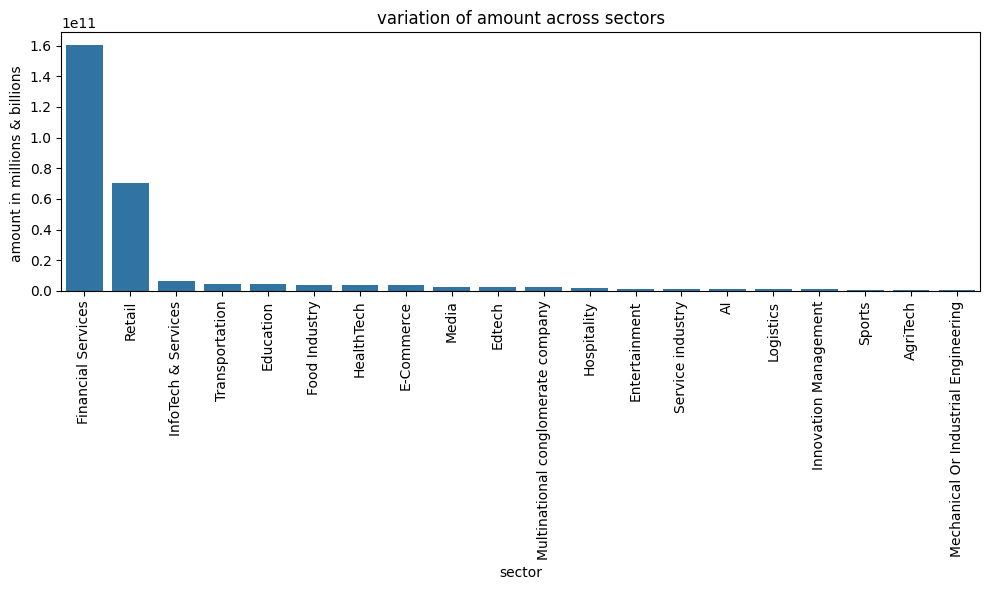

In [95]:
sector_amount= dataset.groupby('sector')['amount'].sum()
top_20 = pd.DataFrame(sector_amount.sort_values(ascending=False).head(20))


plt.figure(figsize=(10,6))
bars = sns.barplot(data=top_20, x='sector', y='amount')
plt.title('variation of amount across sectors')
plt.xlabel('sector')
plt.ylabel('amount in millions & billions ')
plt.xticks(rotation=90)

plt.tight_layout()


plt.show()

OBSERVATION

Financial services is the most funded sector among all other sectors with Retail following closely as the second most funded sector.

#### **2. How does funding vary with the location of the start-ups**


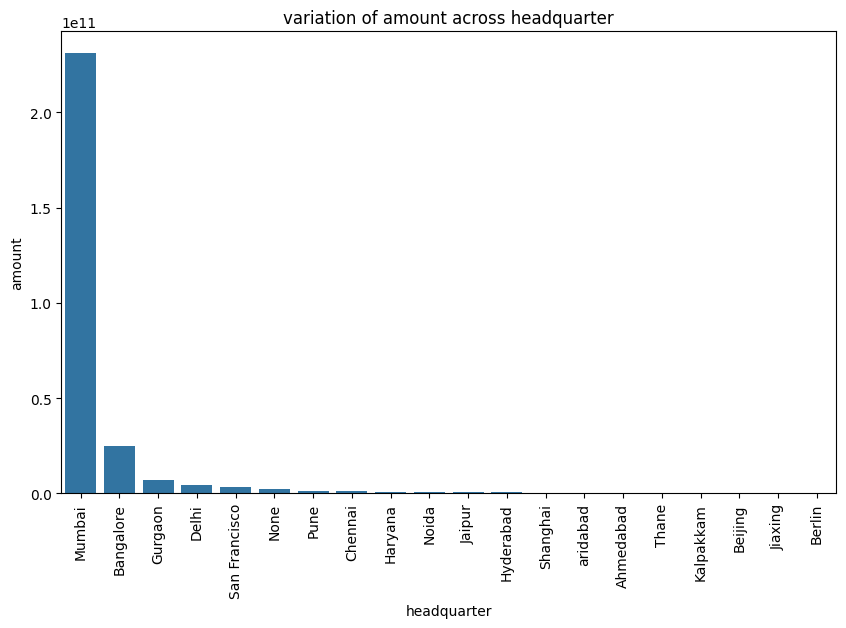

In [97]:
headquarter_amount= dataset.groupby('headquarter')['amount'].sum()
top_20 = pd.DataFrame(headquarter_amount.sort_values(ascending=False).head(20))


plt.figure(figsize=(10,6))
sns.barplot(data=top_20, x='headquarter', y='amount')
plt.title('variation of amount across headquarter')
plt.xlabel('headquarter')
plt.ylabel('amount')
plt.xticks(rotation=90)
plt.show()

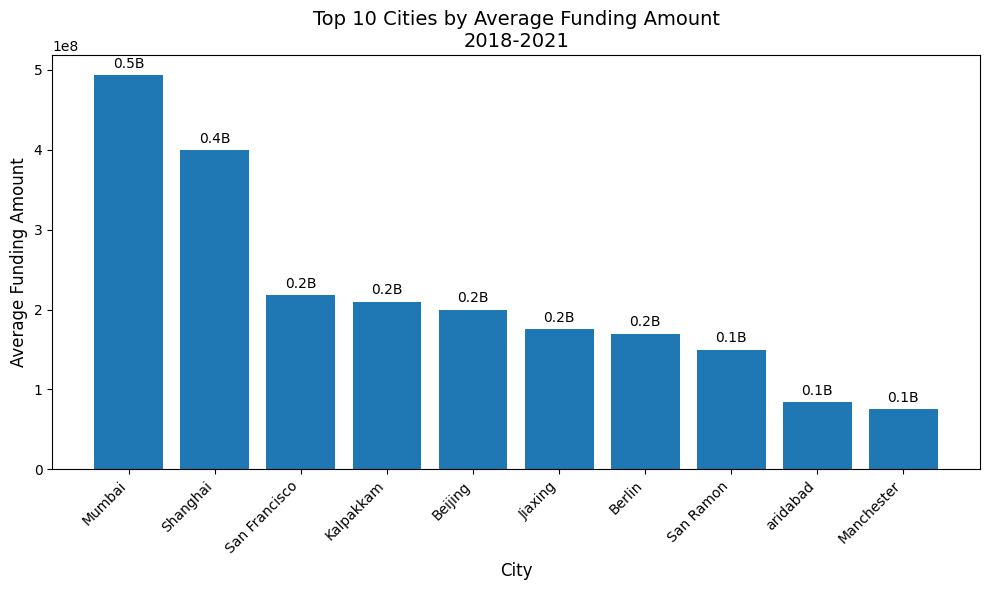

In [98]:
# Group by 'headquarter' and calculate the mean amount
location_funding = dataset.groupby('headquarter')['amount'].mean().reset_index()

# Sort by mean funding amount and select the top 10 cities
top_10_cities = location_funding.sort_values('amount', ascending=False).head(10)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_10_cities['headquarter'], top_10_cities['amount'])

# Add labels and title
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Funding Amount', fontsize=12)
plt.title('Top 10 Cities by Average Funding Amount\n2018-2021', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the mean funding amount
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height / 1e9:.1f}B',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### **Observations**  
- Mumbai's startups get the most money on average and it is the highest total funded among all the cities. Following with Bangalore. 

- There's clear variation in funding across different cities. Mumbai,Shangai, San Francisco, Kalpakkan, and Beijing startups are more likely to secure over $0.2 billion on average.



### **Conclusion**
- Startups located in Mumbai receive more funding on average than startups in other locations.

#### **3. What is the relationship between amount of funding and stage**

In [99]:
stage_funding_dist = dataset.groupby('series')['amount'].sum().sort_values(ascending=False)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Series': stage_funding_dist.index, 'Total Funding': stage_funding_dist.values})

# Create an  horizontal bar chart
fig = px.bar(plot_df, x='Total Funding', y='Series', orientation='h',
             labels={'Total Funding': 'Amount of Funding in Billion Dollars'},
             title='Total Funding Amounts Per Series\n2018-2021',
             template='plotly_dark')
for i, value in enumerate(stage_funding_dist.values):
    fig.add_annotation(x=value + 1e7, y=stage_funding_dist.index[i],
                       text=f'{int(value / 1e7)}B', showarrow=False, font=dict(size=10))
fig.show()

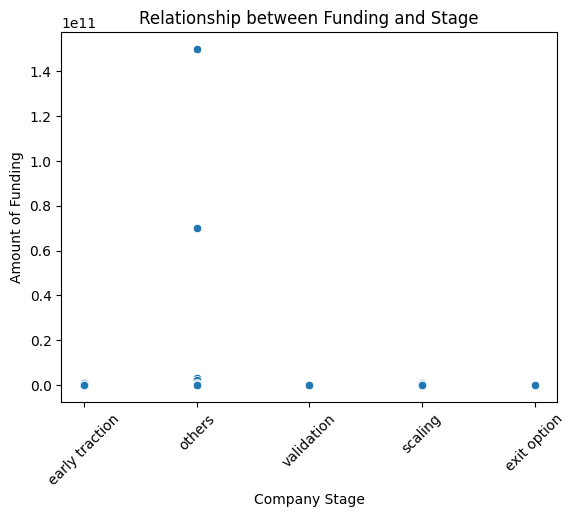

In [100]:
sns.scatterplot(y="amount", x="series", data= dataset)
plt.ylabel("Amount of Funding")
plt.xlabel("Company Stage")
plt.title("Relationship between Funding and Stage")

# Tilt the x-axis title by 45 degrees
plt.xticks(rotation=45)
plt.show()

### **Observations**  
- Category 'Others' being the best funded stage received 251B in total
- Exit option is the worst funded with about a Billion in funding  
- **A clear trend emerges – the more mature the startup, the more likely it is to attract substantial funding**

In [101]:
# Group by 'series' and calculate the mean amount
stage_funding_dist = dataset.groupby('series')['amount'].mean().sort_values(ascending=False).reset_index()

# Create a TreeMap visualization
fig = px.treemap(stage_funding_dist, path=['series'], values='amount', title='Average Funding Per Stage',
                 labels={'amount': 'Average amount of Funding in Dollars'},
                 custom_data=['amount'])  # Use custom_data to store the data for labels
fig.update_traces(textinfo='label+value')
fig.show()

### **Observations**
- We can comfortably infer that startups that are more mature get more funding on average

#### **4. How have funding trends evolved between 2018 and 2021**

In [102]:
from matplotlib.ticker import FuncFormatter

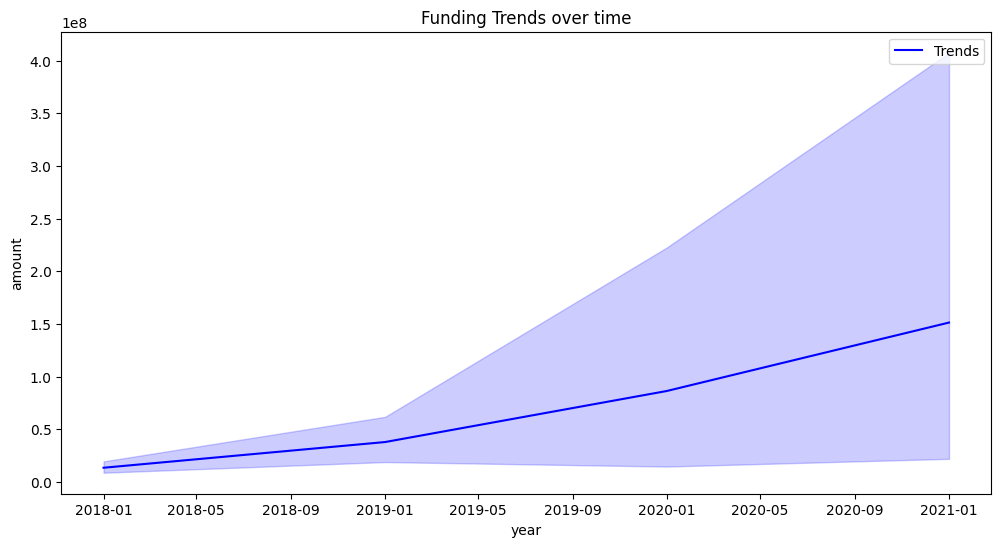

In [103]:

plt.figure(figsize=(12, 6)) # Setting the figure size
sns.lineplot(data=dataset, x='year', y='amount', label="Trends", color='blue')

# Adding labels and title
plt.xlabel('year')
plt.ylabel('amount')
plt.title('Funding Trends over time')

plt.show()


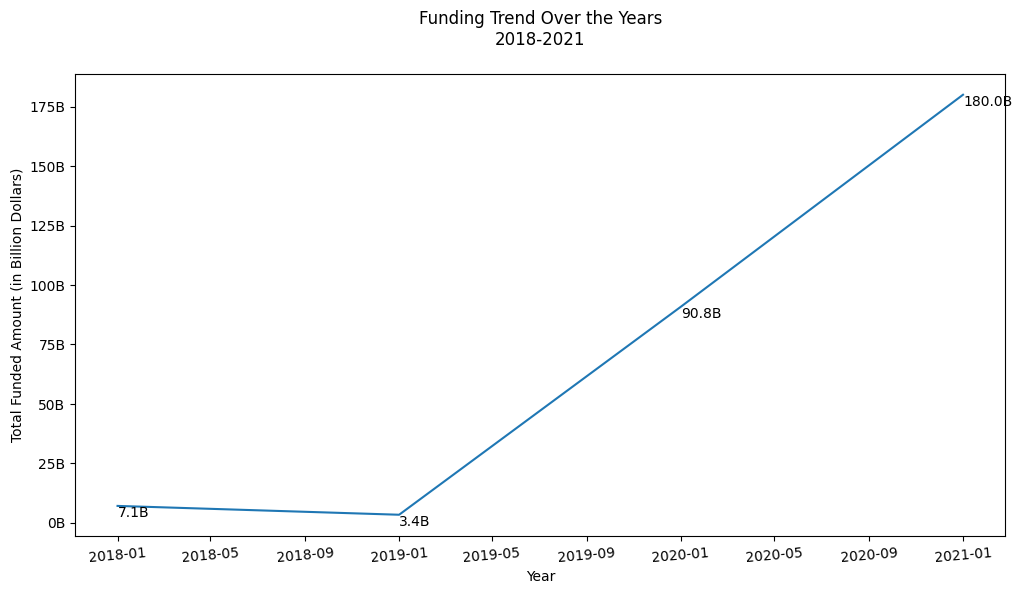

In [104]:
# Plot a line graph to display the trend over the year
funding_trend = dataset.groupby('year')['amount'].sum()
funding_trend = pd.DataFrame(funding_trend).reset_index()
funding_trend = funding_trend.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=funding_trend, x='year', markersize=5, y='amount')
plt.title('Funding Trend Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount (in Billion Dollars)')
plt.xticks(rotation=5)
ax.grid(False)
# ax.xaxis.set_major_locator(YearLocator())
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,}'.format(int(x))))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
for i, label in enumerate(funding_trend['amount']):
    year = funding_trend['year'].iloc[i]
    y_value = funding_trend['amount'].iloc[i]
    label_text = f'{label / 1e9:.1f}B' if not pd.isna(label) else 'N/A'
    plt.text(year, y_value, label_text, ha='left', va='top', color='black', fontsize=10)
plt.show()

### **Observations**  
- There was a modest decline in funding amounts between 2018 and 2019. However, from 2019 to 2021, there was a remarkable and abrupt increase, with a substantial difference of over 176 billion between the funding levels in 2019 and 2021. 
- 2021 is by far the best funded year with over 179B in funding

##### **4.2 Evolution of Funding Trends Across Top Locations Over the Years**

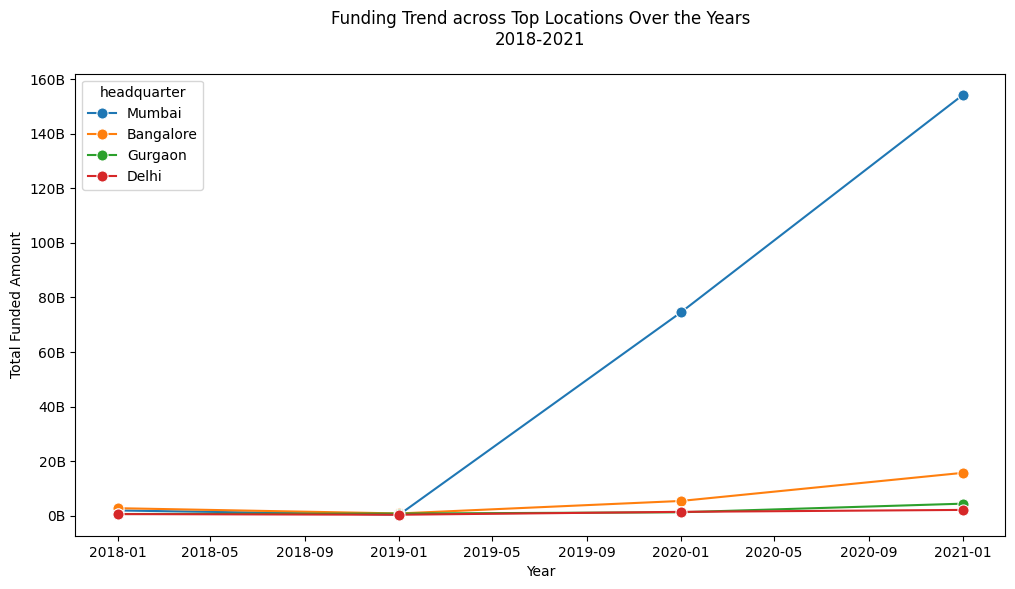

In [105]:
# plot a line graph for the top four funded locations
dataset['year'] = pd.to_datetime(dataset['year'], format='%Y')
location_trend = dataset.groupby(['headquarter', 'year'])['amount'].sum().sort_values(ascending=False)
top_locations = location_trend.groupby('headquarter').sum().nlargest(4).index
# Filter the original DataFrame for the top 5 locations
location_trend_top4 = location_trend[location_trend.index.get_level_values('headquarter').isin(top_locations)].reset_index()
location_trend_top4_reset = location_trend_top4.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=location_trend_top4_reset, x='year', y='amount', hue='headquarter', marker='o', markersize=8)
plt.title('Funding Trend across Top Locations Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.grid(False)
# ax.xaxis.set_major_locator(YearLocator())
plt.show()

### **Observations**  
- Mumbai stands out as the most well-funded location, exhibiting a funding trend that closely mirrors the overall funding pattern. In contrast, Bangalore, Gurgaon, Delhi and all other cities follow at a considerable distance.


   
     

##### **3.3 Evolution of Funding Trends Across Top Sectors Over the Years**

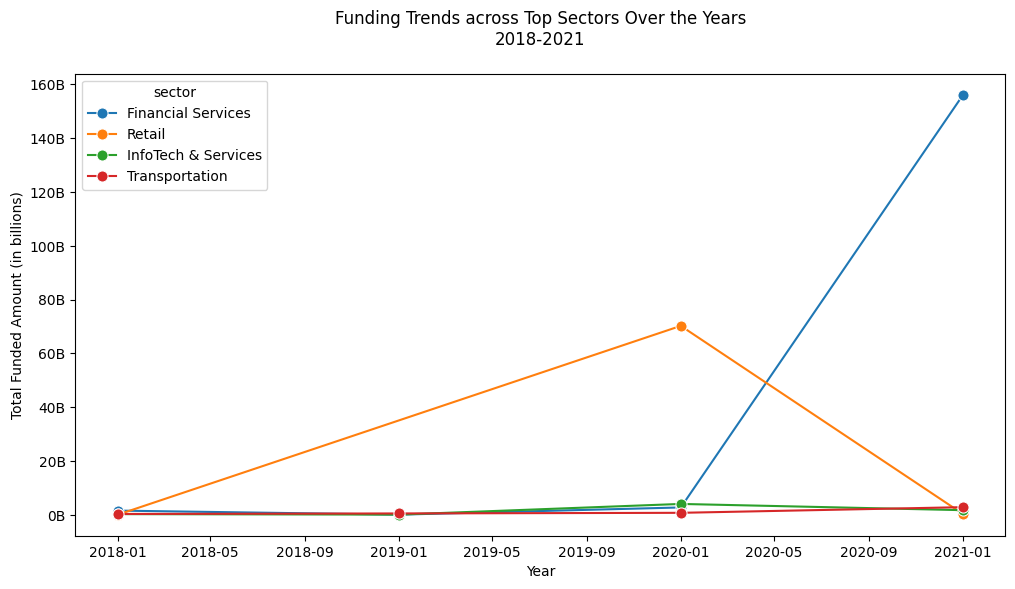

In [106]:
# Plot a line graph to visualize trend of funding across top top_sectors
dataset['year'] = pd.to_datetime(dataset['year'], format='%Y')
sector_trend = dataset.groupby(['sector', 'year'])['amount'].sum().sort_values(ascending=False)
top_sectors = sector_trend.groupby('sector').sum().nlargest(4).index
sector_trend_top4 = sector_trend[sector_trend.index.get_level_values('sector').isin(top_sectors)].reset_index()
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=sector_trend_top4, x='year', y='amount', hue='sector', marker='o', markersize=8)
plt.title('Funding Trends across Top Sectors Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount (in billions)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.grid(False)
# ax.xaxis.set_major_locator(YearLocator())
plt.show()

### **Observations**  

-While the top four seem to take lead when it comes to being the most funded between the four years. In 2020 is where Financial services trajectory changed by being the best funded sector especially in 2021.

- In contrast Retail was the most funded in 2018 to 2020, subsequently dropping from 2020 to 2021.

-The rest of the sectors still show a quite significance in increase throughout the years clearly showing that those years were the most invested years across all four years.

##### **3.4 Evolution of Funding Trends Across Startup Stages Over the Years**

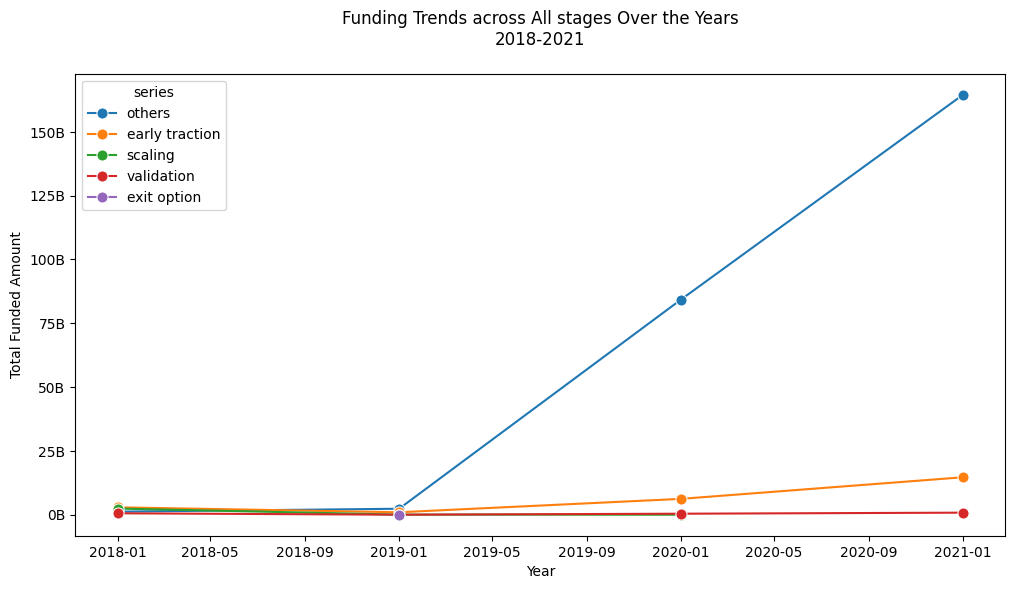

In [107]:
# plot a line graph for the top four funded series
dataset['year'] = pd.to_datetime(dataset['year'], format='%Y')
series_trend = dataset.groupby(['series', 'year'])['amount'].sum().sort_values(ascending=False)
top_series = series_trend.groupby('series').sum().index
# Filter the original DataFrame for the top 4 series
series_trend_top4 = series_trend[series_trend.index.get_level_values('series').isin(top_series)].reset_index()
series_trend_top4_reset = series_trend_top4.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=series_trend_top4_reset, x='year', y='amount', hue='series', marker='o', markersize=8)
plt.title('Funding Trends across All stages Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.grid(False)
# ax.xaxis.set_major_locator(YearLocator())
plt.show()


### **Observations**
- From the Graph above, Over the years, "Other" category which includes Private Equity, Corporate Round, Undisclosed, Non-equity Assistance, Debt, Bridge, and Edge has seen a tremendous growth in the amount of funding  received. These types of funding are often associated with more mature startups. As the startup ecosystem has matured, investors have become more comfortable investing in later-stage startups that are closer to profitability.

### **Conclusion**
**Startup Funding Trends**

Startup funding is experiencing a significant surge, especially in the financial services sector. Among various locations, Mumbai stands out as the epicenter of this growth.

**Key Points:**
- **Rising Trends:** Startup funding is on a tremendous rise.
- **Location Spotlight:** Mumbai leads the charts as the location with the most substantial rise in startup funding.
- **Industry Focus:** Financial services emerges as the industry experiencing the most significant surge in funding.


#### **5. Which are the most attractive sectors for investors?**


##### **5.1 __Total Funding per Sector__**

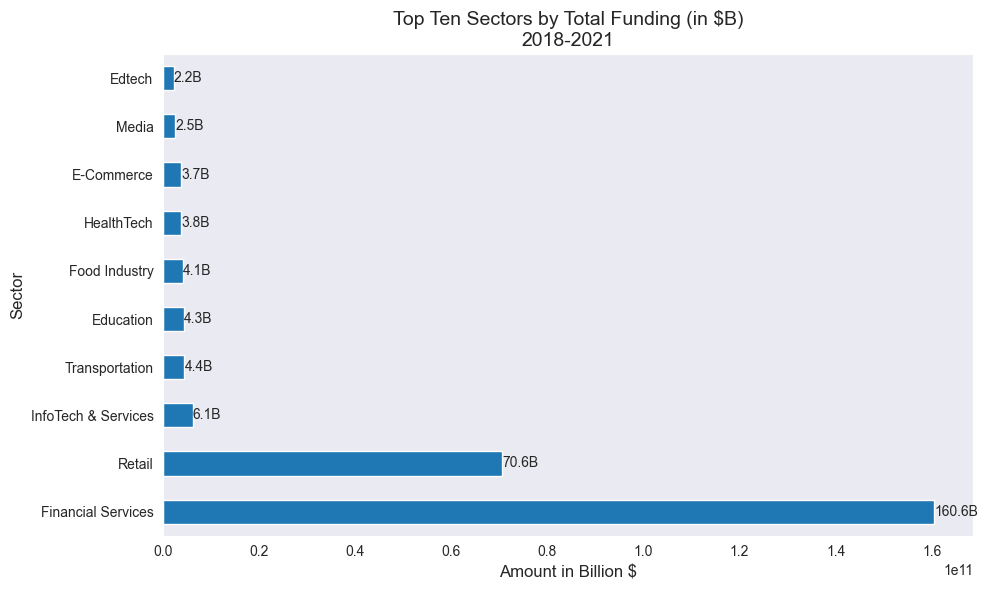

In [108]:
# Sort sectors by funding amount
sectors_by_funding = dataset.groupby('sector')['amount'].sum().sort_values(ascending=False)

# Select top ten sectors
top_ten_sectors_by_funding = sectors_by_funding.head(10)

# Set Seaborn style
sns.set_style("darkgrid")

# Plotting using Pandas
fig, ax = plt.subplots(figsize=(10, 6))
top_ten_sectors_by_funding.plot(kind='barh', ax=ax)
ax.set_title('Top Ten Sectors by Total Funding (in $B)\n2018-2021', fontsize=14)
ax.set_xlabel('Amount in Billion $', fontsize=12)
ax.set_ylabel('Sector', fontsize=12)
ax.grid(False)
# Annotate the bars
for i, (sector, amount) in enumerate(top_ten_sectors_by_funding.items()):
    ax.annotate(f'{amount / 1e9:.1f}B', xy=(amount, i), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### **Observations**
- Financial services and Retail sectors stand out as the most attractive for investors.
- The two sectors have received the most funding over the year
- These sectors have received significant funding, making them key players in the startup investment landscape.

##### **5.2 __Average Funding per Sector__**

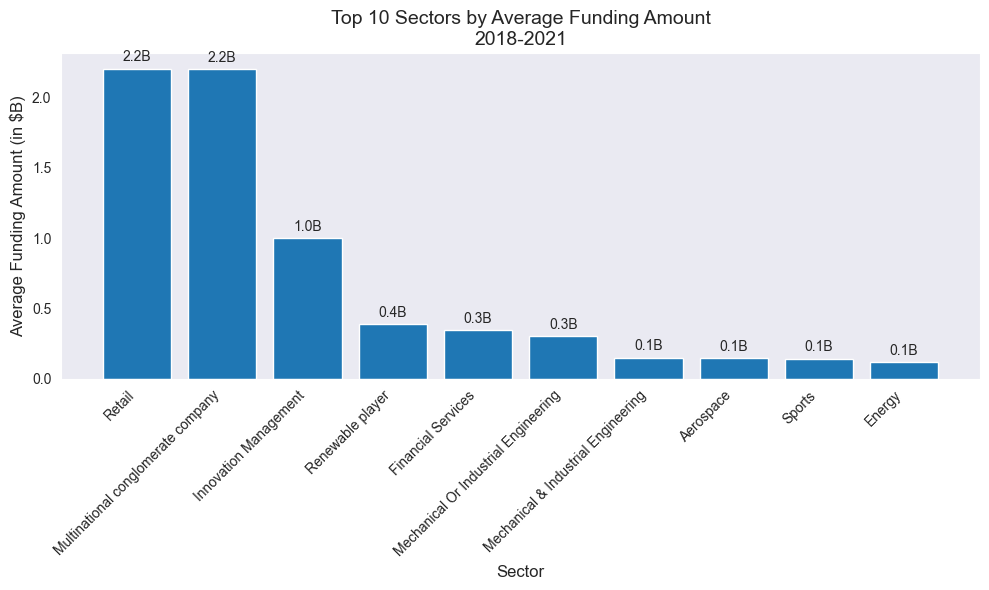

In [109]:
# Find the average funding amount for each sector
avg_sectors_funding = dataset.groupby('sector')['amount'].mean().reset_index()

# Convert the amount to billion dollars
avg_sectors_funding['amount_in_billion'] = avg_sectors_funding['amount'] / 1e9

# Sort sectors by average funding amount and select the top 10
top_ten_sectors = avg_sectors_funding.sort_values('amount_in_billion', ascending=False).head(10)

# Set Seaborn style
sns.set_style("darkgrid")

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_ten_sectors['sector'], top_ten_sectors['amount_in_billion'])

# Add labels and title
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Average Funding Amount (in $B)', fontsize=12)
plt.title('Top 10 Sectors by Average Funding Amount\n2018-2021', fontsize=14)
ax.grid(False)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the average funding amount
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}B',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### **Conclusion**
   - The most attractive sectors in average for investors is  Retail


#### **6. Does the location of the company influence its sector?**

In [110]:
# Get the top 7 sectors and top 7 locations based on total funding amount
top_sectors = dataset.groupby('sector')['amount'].sum().sort_values(ascending=False).head(7).index
top_locations = dataset.groupby('headquarter')['amount'].sum().sort_values(ascending=False).head(7).index

# Filter the DataFrame for the top 7 sectors and top 7 locations
df_top7 = dataset[dataset['sector'].isin(top_sectors) & dataset['headquarter'].isin(top_locations)]

# Create a heatmap
fig = px.density_heatmap(df_top7, 
                         x='headquarter', 
                         y='sector', 
                         title='Top 7 Sectors and Locations Heatmap \n2018-2021',
                         labels={'headquarter': 'Headquarter Location', 'sector': 'Sector'})
fig.show()

### **Observations**  
**Top Industries and Locations:**   

- Top industries exhibit a concentration in the leading locations.  Therefore, Location of a company does influences its sector

**Sectors Concentration:**  

- Consistent pattern reveals a correlation between a sector's dominance and its prevalent location.  
This consistency suggests a nuanced influence of geography on flourishing industries.  

**Outliers Analysis:**  

- Instances of outliers are notable, such as in Bangalore where Fintech and Education Tech industries concentrate more.  

**Conclusion:**   

- The data strongly supports the notion that top industries tend to concentrate in the leading locations.

# **Summary and Recommendations**

### **Summary**
**Funding Trends**  
- Funding experienced a modest decline from 2018 to 2019, followed by a remarkable increase of over $176 billion from 2019 to 2021.
- 2021 stands out as the best-funded year, surpassing $179 billion.

**Geographical Dynamics**
- Mumbai is the most well-funded location, with other cities trailing at a considerable distance.
- Notable variations across cities, with Mumbai, Kalpakkan, and Beijing leading.

**Sector-Specific Insights**
- Retail and financial services sectors attract the most funding, with 'Others' (Private Equity, Corporate Round, Debt) showing substantial growth.

**Key Players**
- Silver Lake and Mubadala Investment Company lead all investors, contributing a massive $70 billion.

### **Recommendations**  
1. **Location Consideration:**  
   - Investors should focus on top-funded locations like Mumbai, Bangalore, Kalpakkan, and Beijing.  
   
2. **Sector-Specific Investments:**  
   - Explore opportunities in financial services and retail, the most attractive sectors for investors.  
   
3. **Emerging Trends:**  
   - Monitor trends in mature startups in the 'Others' category, signaling investor comfort with later-stage ventures.  
   
4. **Diversification:**  
   - Diversify portfolios across locations and sectors for a balanced risk-return profile.  


In [111]:
dataset.to_csv('data.csv')